In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 

In [3]:
df= pd.read_csv("framingham.csv")

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df_original=df.copy()
df.drop(columns='education', inplace=True)


In [6]:
df.rename(columns={'male':'Sex_male'},inplace=True)

In [7]:
df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
df.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isnull().sum()

Sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [11]:
print(df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [12]:
X=np.asarray(df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])
y=np.asarray(df['TenYearCHD'])
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [18]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print('Train : ',X_train.shape, y_train.shape)
print('Test : ',X_test.shape,y_test.shape)

Train :  (2625, 6) (2625,)
Test :  (1126, 6) (1126,)


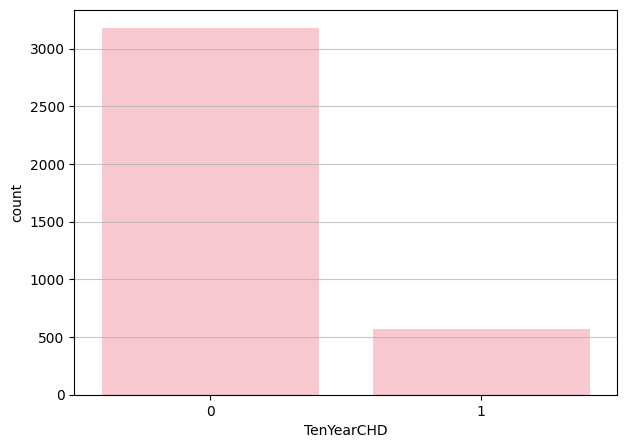

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(x='TenYearCHD',data=df,color='pink')
plt.grid(axis='y', linestyle='-',alpha=0.7)
plt.show()

0 - нет болезни сердца, 1 - есть.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
model = LogisticRegression(
    class_weight='balanced',
    C=0.1,
    max_iter=1000,
    random_state=42)
model.fit(X_train, y_train)

# Предсказание вероятностей
y_proba = model.predict_proba(X_test)[:, 1] 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78       954
           1       0.28      0.70      0.40       172

    accuracy                           0.68      1126
   macro avg       0.60      0.68      0.59      1126
weighted avg       0.83      0.68      0.72      1126

ROC-AUC: 0.7375615523377701
